# Introduction to Pandas

**`pandas`** is a Python package providing ***fast, flexible, and expressive data structures*** designed to work with *relational* or *labeled* data or both. 

<br></br> <br></br>

<center>
    
*It is a fundamental high-level building block for doing practical, real world data analysis in Python.*

</center> 

##### <center>..... and cooking with data!</center>

Pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

Key features:
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

creates an embedded inline frame (often just called an "iframe") in a Jupyter notebook using the IFrame class from IPython.display.

In [3]:
from IPython.display import IFrame 

# Display the website inside an iframe
IFrame(src="http://pandas.pydata.org", width=800, height=350) #the official website for the pandas library.

## Introduction to Pandas Data Structures

Imagine you're a librarian, and you're in charge of organizing a lot of different information - from a simple list of book titles to a full database of books, authors, publish dates, and genres. In the world of Python, the pandas library is like your library toolkit, helping you manage all this data effortlessly.

There are two main "containers" in this toolkit:

1.Series.

Think of it as a single column of data, like a list.
Every item in this list has a unique label, just like every book in a library has a unique position or code.
Useful for one-dimensional data. For example, a list of names or a collection of book titles.

2.DataFrame.

Now, imagine a whole table or spreadsheet that not only lists book titles but also their authors, publish dates, and genres. Each row of the table has a unique label, and each column has a title.
Suitable for more complex data with multiple attributes. It's like a detailed catalog of books in the library.

These two structures, Series and DataFrame, are the building blocks you'll use most often with pandas. Whether you're looking to handle a simple list of data or wanting to analyze a large dataset with various attributes, pandas has got you covered!

### Series

A **Series** is a single vector of data (like a NumPy array) with an *index* that labels each element in the vector.

More information about pd.Series: https://pandas.pydata.org/docs/reference/api/pandas.Series.html

In [2]:
import pandas as pd
counts = pd.Series([632, 1638, 569, 115])
counts

0     632
1    1638
2     569
3     115
dtype: int64

Getting values out of a series:

In [4]:
counts.values

array([ 632, 1638,  569,  115])

Getting indexes of the series:

In [5]:
counts.index

RangeIndex(start=0, stop=4, step=1)

### Example 1 - Bacteria :

We can assign meaningful labels to the index, if they are available:

In [6]:
bacteria = pd.Series([632, 1638, 569, 115], index =['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

bacteria

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

These labels can be used to refer to the values in the `Series`.

In [7]:
bacteria['Actinobacteria']

569

In [8]:
bacteria[[name.endswith('bacteria') for name in bacteria.index]]

Proteobacteria    1638
Actinobacteria     569
dtype: int64

In [9]:
[name.endswith('bacteria') for name in bacteria.index]

[False, True, True, False]

Notice that the indexing operation preserved the association between the values and the corresponding indices.

We can still use positional indexing if we wish.

In [10]:
bacteria[0]

632

We can give both the array of values and the index meaningful labels themselves:

In [11]:
bacteria.name = 'counts'
bacteria.index.name = 'phylum'
bacteria

phylum
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
Name: counts, dtype: int64

NumPy's math functions and other operations can be applied to Series without losing the data structure.

In [12]:
import numpy as np
np.log(bacteria)   

phylum
Firmicutes        6.448889
Proteobacteria    7.401231
Actinobacteria    6.343880
Bacteroidetes     4.744932
Name: counts, dtype: float64

The result will be a new pandas Series with the same indices ('Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'), but the values will be the natural logarithms of the original values.

We can also filter according to the values in the `Series`:

In [13]:
bacteria[bacteria>1000]

phylum
Proteobacteria    1638
Name: counts, dtype: int64

A `Series` can be thought of as an ordered key-value store. In fact, we can create one from a `dict`:

In [14]:
bacteria_dict = {'Firmicutes': 632, 'Proteobacteria': 1638, 'Actinobacteria': 569, 'Bacteroidetes': 115}
pd.Series(bacteria_dict)  
#print(bacteria_dict)

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

### what's the difference between pd.Series and print?

When you print the dictionary directly, you'll see the standard Python dictionary representation:

{'Firmicutes': 632, 'Proteobacteria': 1638, 'Actinobacteria': 569, 'Bacteroidetes': 115}

Converting the dictionary to a pandas Series and then displaying it provides a columnar format, which can be more readable and is consistent with other pandas displays. This could be especially helpful when dealing with large datasets.



Notice that the `Series` is created in key-sorted order.

If we pass a custom index to `Series`, it will select the corresponding values from the dict, and treat indices without corrsponding values as missing. Pandas uses the `NaN` (not a number) type for missing values.

In [15]:
bacteria2 = pd.Series(bacteria_dict, index=['Cyanobacteria','Firmicutes','Proteobacteria','Actinobacteria'])
bacteria2

Cyanobacteria        NaN
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

.isnull( )  is used to detect missing or NA values. When applied, it returns a mask of the same shape as the original object, with True where values are missing/NA and False where values are present.

In [16]:
bacteria2.isnull()

Cyanobacteria      True
Firmicutes        False
Proteobacteria    False
Actinobacteria    False
dtype: bool

Critically, the labels are used to **align data** when used in operations with other Series objects:

In [17]:
bacteria

phylum
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
Name: counts, dtype: int64

In [18]:
bacteria2

Cyanobacteria        NaN
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

In [19]:
bacteria + bacteria2

Actinobacteria    1138.0
Bacteroidetes        NaN
Cyanobacteria        NaN
Firmicutes        1264.0
Proteobacteria    3276.0
dtype: float64

Contrast this with NumPy arrays, where arrays of the same length will combine values element-wise; adding Series combined values with the same label in the resulting series. Notice also that the missing values were propogated by addition.

### DataFrame

Imagine you have a spreadsheet or a table where each row has a unique label (like a name or date) and each column has a specific title (like "Age", "Grade", or "Score"). Within this table, you can store various kinds of information like numbers, text, dates, and even more complex types.

In the world of Python and data science, this table is called a DataFrame.

A DataFrame is like a powerful, programmable spreadsheet. It allows you to store data that has multiple attributes or properties. For instance, if you were storing information about students, each student (the row) could have details like their age, grade, and score (the columns). And each of these details might be of a different kind - age is a number, grade could be a letter, and score could be a percentage.

In short, when you have data that has multiple attributes (like height, weight, age, etc.) for each entry, you'd likely use a DataFrame. It's an essential tool for data analysis, especially when working with varied types of data.

More information: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [20]:
data = pd.DataFrame({'value':[632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient':[1, 1, 1, 1, 2, 2, 2, 2],
                     'classification':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
    'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
data

,value,patient,classification
0,632,1,Firmicutes
1,1638,1,Proteobacteria
2,569,1,Actinobacteria
3,115,1,Bacteroidetes
4,433,2,Firmicutes
5,1130,2,Proteobacteria
6,754,2,Actinobacteria
7,555,2,Bacteroidetes


Notice the `DataFrame` is sorted by column name. We can change the order by indexing them in the order we desire:

In [21]:
data[['classification','value','patient']]

,classification,value,patient
0,Firmicutes,632,1
1,Proteobacteria,1638,1
2,Actinobacteria,569,1
3,Bacteroidetes,115,1
4,Firmicutes,433,2
5,Proteobacteria,1130,2
6,Actinobacteria,754,2
7,Bacteroidetes,555,2


A `DataFrame` has a second index, representing the columns:

In [22]:
data.columns

Index(['value', 'patient', 'classification'], dtype='object')

If we wish to access columns, we can do so either by dict-like indexing or by attribute:

In [23]:
data['value']

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

In [24]:
data.value

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

Notice this is different than with `Series`, where dict-like indexing retrieved a particular element (row). If we want access to a row in a `DataFrame`, we index its `ix` (or `loc`) attribute.


In [25]:
data.loc[3]

value                       115
patient                       1
classification    Bacteroidetes
Name: 3, dtype: object

Alternatively, we can create a `DataFrame` with a dict of dicts:

In [26]:
data = pd.DataFrame({0: {'patient': 1, 'classification': 'Firmicutes', 'value': 632},
                    1: {'patient': 1, 'classification': 'Proteobacteria', 'value': 1638},
                    2: {'patient': 1, 'classification': 'Actinobacteria', 'value': 569},
                    3: {'patient': 1, 'classification': 'Bacteroidetes', 'value': 115},
                    4: {'patient': 2, 'classification': 'Firmicutes', 'value': 433},
                    5: {'patient': 2, 'classification': 'Proteobacteria', 'value': 1130},
                    6: {'patient': 2, 'classification': 'Actinobacteria', 'value': 754},
                    7: {'patient': 2, 'classification': 'Bacteroidetes', 'value': 555}})

In [27]:
data

,0,1,2,3,4,5,6,7
patient,1,1,1,1,2,2,2,2
classification,Firmicutes,Proteobacteria,Actinobacteria,Bacteroidetes,Firmicutes,Proteobacteria,Actinobacteria,Bacteroidetes
value,632,1638,569,115,433,1130,754,555


We probably want this transposed:

In [28]:
data = data.T
data

,patient,classification,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


When you index or select a subset of a DataFrame to create a Series, you're not creating a brand-new separate piece of data in memory. Instead, you're creating a "view" that points to the same memory location as the original DataFrame.
So you must be cautious when manipulating this data:

In [29]:
vals = data.value
vals

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: object

In [30]:
vals[5] = 0
vals

0     632
1    1638
2     569
3     115
4     433
5       0
6     754
7     555
Name: value, dtype: object

In [31]:
data

,patient,classification,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


In [32]:
vals = data.value.copy()     #This creates a separate copy of the value column from the data DataFrame. 
vals[5] = 1000
data

,patient,classification,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


if you print or view vals, you'll see the modified value, but if you look at the data DataFrame, it remains unchanged.

In [33]:
print(vals)

0     632
1    1638
2     569
3     115
4     433
5    1000
6     754
7     555
Name: value, dtype: object


If you want the change in vals to be reflected in the data DataFrame as well, you shouldn't make a copy of the value column. Instead, you should directly reference it.

In [34]:
data.value[3] = 14
data

,patient,classification,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,14
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


We can create or modify columns by assignment:

In [35]:
data['year'] = 2013
data

,patient,classification,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,433,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,754,2013
7,2,Bacteroidetes,555,2013


But note, we cannot use the attribute indexing method to add a new column:

In [36]:
data.treatment = 1
data

,patient,classification,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,433,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,754,2013
7,2,Bacteroidetes,555,2013


In [37]:
data.treatment

1

Other Python data structures (ones without an index) need to be the same length as the `DataFrame`:

In [38]:
month = ['Jan', 'Feb', 'Mar', 'Apr']
data['month'] = month

ValueError: Length of values (4) does not match length of index (8)

In [39]:
data['month'] = ['Jan']*len(data)
data

,patient,classification,value,year,month
0,1,Firmicutes,632,2013,Jan
1,1,Proteobacteria,1638,2013,Jan
2,1,Actinobacteria,569,2013,Jan
3,1,Bacteroidetes,14,2013,Jan
4,2,Firmicutes,433,2013,Jan
5,2,Proteobacteria,0,2013,Jan
6,2,Actinobacteria,754,2013,Jan
7,2,Bacteroidetes,555,2013,Jan


We can use `del` to remove columns, in the same way `dict` entries can be removed:

In [40]:
del data['month']
data

,patient,classification,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,433,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,754,2013
7,2,Bacteroidetes,555,2013


We can extract the underlying data as a simple `array` by accessing the `values` attribute:

In [41]:
data.values

array([[1, 'Firmicutes', 632, 2013],
       [1, 'Proteobacteria', 1638, 2013],
       [1, 'Actinobacteria', 569, 2013],
       [1, 'Bacteroidetes', 14, 2013],
       [2, 'Firmicutes', 433, 2013],
       [2, 'Proteobacteria', 0, 2013],
       [2, 'Actinobacteria', 754, 2013],
       [2, 'Bacteroidetes', 555, 2013]], dtype=object)

Notice that because of the mix of string and integer (and `NaN`) values, the dtype of the array is `object`. The dtype will automatically be chosen to be as general as needed to accomodate all the columns.

Pandas uses a custom data structure to represent the indices of Series and DataFrames.

In [42]:
data.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

Index objects are immutable:

In [43]:
data.index[0] = 15

TypeError: Index does not support mutable operations

This is so that Index objects can be shared between data structures without fear that they will be changed.

In [44]:
bacteria2.index = bacteria.index

In [45]:
bacteria2

phylum
Firmicutes           NaN
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

## Importing data

In the journey of data analysis, one of the foundational steps is bringing your data into the environment where you'll work with it. This step, often termed as "data importing," might seem simple at a glance. After all, if you've worked with Python, you've likely used built-in tools or libraries like NumPy to swiftly load arrays or matrices.

Take this example using NumPy:

    genes = np.loadtxt("genes.csv", delimiter=",", dtype=[('gene', '|S10'), ('value', '<f4')])
    
Here, we're loading a CSV file into a structured NumPy array. While this works well for basic structured data, the real-world often throws more complex, messy datasets our way. And that's where the challenge lies: importing such structured data efficiently, ensuring it's correctly formatted and ready for analysis.

Pandas provides a convenient set of functions for importing tabular data in a number of formats directly into a `DataFrame` object. These functions include options to perform type inference, indexing, parsing, iterating and cleaning automatically as data are imported.

In essence, Pandas not only simplifies the process of importing data but also ensures that the data is in the best shape for analysis from the get-go. This reduces the amount of preprocessing required, allowing you to dive into analysis more quickly and confidently.


Let's start with some more bacteria data, stored in csv format.

In [46]:
!head data/microbiome.csv   #display the first 10 lines of the file microbiome.csv 

Taxon,Patient,Tissue,Stool
Firmicutes,1,632,305
Firmicutes,2,136,4182
Firmicutes,3,1174,703
Firmicutes,4,408,3946
Firmicutes,5,831,8605
Firmicutes,6,693,50
Firmicutes,7,718,717
Firmicutes,8,173,33
Firmicutes,9,228,80


This table can be read into a DataFrame using `read_csv`:

The head( ) method by default shows the first 5 rows, but you can specify a different number if you wish, e.g., df.head(10) to show the first 10 rows.

In [47]:
mb = pd.read_csv("data/microbiome.csv")
mb.head()

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,1174,703
3,Firmicutes,4,408,3946
4,Firmicutes,5,831,8605


Notice that `read_csv` automatically considered the first row in the file to be a header row.

We can override default behavior by customizing some the arguments, like `header`, `names` or `index_col`.

In [48]:
pd.read_csv("data/microbiome.csv", header=None).head()

,0,1,2,3
0,Taxon,Patient,Tissue,Stool
1,Firmicutes,1,632,305
2,Firmicutes,2,136,4182
3,Firmicutes,3,1174,703
4,Firmicutes,4,408,3946


`read_csv` is just a convenience function for `read_table`, since csv is such a common format:

In [49]:
mb = pd.read_table("data/microbiome.csv", sep=',')

The `sep` argument can be customized as needed to accomodate arbitrary separators. For example, we can use a regular expression to define a variable amount of whitespace, which is common in some data formats: 
    
    sep='\s+'

For a more useful index, we can specify the first two columns, which together provide a unique index to the data.

In [50]:
mb = pd.read_csv("data/microbiome.csv", index_col=['Taxon','Patient'])
mb.head()

Tissue  Stool
Taxon      Patient               
Firmicutes 1           632    305
           2           136   4182
           3          1174    703
           4           408   3946
           5           831   8605

This is called a *hierarchical* index, which we will revisit later.

If we have sections of data that we do not wish to import (for example, known bad data), we can populate the `skiprows` argument:

In [51]:
pd.read_csv("data/microbiome.csv", skiprows=[3,4,6]).head()

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,5,831,8605
3,Firmicutes,7,718,717
4,Firmicutes,8,173,33


Conversely, if we only want to import a small number of rows from, say, a very large data file we can use `nrows`:

In [52]:
pd.read_csv("data/microbiome.csv", nrows=4)   #read only the first 4 rows (excluding the header) of data from the file microbiome.csv

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,1174,703
3,Firmicutes,4,408,3946


Alternately, if we want to process our data in reasonable chunks, the `chunksize` argument will return an iterable object that can be employed in a data processing loop. For example, our microbiome data are organized by bacterial classification, with 15 patients represented in each:

In [53]:
data_chunks = pd.read_csv("data/microbiome.csv", chunksize=15)

mean_tissue = {chunk.Taxon.iloc[0]:chunk.Tissue.mean() for chunk in data_chunks}
  
mean_tissue

{'Firmicutes': 684.4,
 'Proteobacteria': 2943.0666666666666,
 'Actinobacteria': 449.06666666666666,
 'Bacteroidetes': 599.6666666666666,
 'Other': 198.8}

Most real-world data is incomplete, with values missing due to incomplete observation, data entry or transcription error, or other reasons. Pandas will automatically recognize and parse common missing data indicators, including `NA` and `NULL`.

In [54]:
!head data/microbiome_missing.csv

Taxon,Patient,Tissue,Stool
Firmicutes,1,632,305
Firmicutes,2,136,4182
Firmicutes,3,,703
Firmicutes,4,408,3946
Firmicutes,5,831,8605
Firmicutes,6,693,50
Firmicutes,7,718,717
Firmicutes,8,173,33
Firmicutes,9,228,NA


In [55]:
pd.read_csv("data/microbiome_missing.csv").head(20)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305.0
1,Firmicutes,2,136,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408,3946.0
4,Firmicutes,5,831,8605.0
5,Firmicutes,6,693,50.0
6,Firmicutes,7,718,717.0
7,Firmicutes,8,173,33.0
8,Firmicutes,9,228,NaN
9,Firmicutes,10,162,3196.0


Above, Pandas recognized `NA` and an empty field as missing data.

In [56]:
pd.isnull(pd.read_csv("data/microbiome_missing.csv")).head(20)

,Taxon,Patient,Tissue,Stool
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,True
9,False,False,False,False


Unfortunately, there will sometimes be inconsistency with the conventions for missing data. In this example, there is a question mark "?" and a large negative number where there should have been a positive integer. We can specify additional symbols with the `na_values` argument:
   

In [57]:
pd.read_csv("data/microbiome_missing.csv", na_values=['?', -99999]).head(20)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632.0,305.0
1,Firmicutes,2,136.0,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408.0,3946.0
4,Firmicutes,5,831.0,8605.0
5,Firmicutes,6,693.0,50.0
6,Firmicutes,7,718.0,717.0
7,Firmicutes,8,173.0,33.0
8,Firmicutes,9,228.0,NaN
9,Firmicutes,10,162.0,3196.0


These can be specified on a column-wise basis using an appropriate dict as the argument for `na_values`.

### Microsoft Excel

Since so much financial and scientific data ends up in Excel spreadsheets (regrettably), Pandas' ability to directly import Excel spreadsheets is valuable. This support is contingent on having one or two dependencies (depending on what version of Excel file is being imported) installed: `xlrd` and `openpyxl` (these may be installed with either `pip` or `easy_install`).

Importing Excel data to Pandas is a two-step process. First, we create an `ExcelFile` object using the path of the file:                                             

In [58]:
mb_file = pd.ExcelFile('data/microbiome/MID1.xls')
mb_file

Then, since modern spreadsheets consist of one or more "sheets", we parse the sheet with the data of interest:

In [59]:
mb1 = mb_file.parse("Sheet 1", header=None)
mb1.columns = ["Taxon", "Count"]
mb1.head()

,Taxon,Count
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7


## Pandas Fundamentals

This section introduces the new user to the key functionality of Pandas that is required to use the software effectively.


### Example 2 - Baseball Data

For some variety, we will leave our digestive tract bacteria behind and employ some baseball data.

In [72]:
baseball = pd.read_csv("data/baseball.csv", index_col='id') 
baseball.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


The index_col='id' argument means that the id column from the baseball.csv file will be used as the index for the resulting baseball DataFrame. Instead of having a default integer-based index (0, 1, 2, ...), the rows will be labeled based on the values in the id column.


- id, unique player id
- year, year of data
- stint
- team, team played for
- lg, league
- g, number of games
- ab, number of times at bat
- r, number of runs
- h, hits, times reached base because of a batted, fair ball without error by the defense
- X2b, hits on which the batter reached second base safely
- X3b, hits on which the batter reached third base safely
- hr, number of home runs
- rbi, runs batted in
- sb, stolen bases
- cs, caught stealing
- bb, base on balls (walk)
- so, strike outs
- ibb, intentional base on balls
- hbp, hits by pitch
- sh, sacrifice hits
- sf, sacrifice flies
- gidp, ground into double play


Notice that we specified the `id` column as the index, since it appears to be a unique identifier. We could try to create a unique index ourselves by combining `player` and `year`:

you're creating a new Series player_id where each entry is a combination of the player column and the year column. The year column is first converted to a string type using .astype(str), so it can be concatenated with the player column.

In [73]:
player_id = baseball.player + baseball.year.astype(str)    # Combining player and year columns:
baseball_newind = baseball.copy()      # Creating a Copy of the Original DataFrame:
baseball_newind.index = player_id      # Setting a New Index:
baseball_newind.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto012006,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
schilcu012006,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
myersmi012006,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
helliri012006,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
johnsra052006,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


This looks okay, but let's check:

In [74]:
baseball_newind.index.is_unique

False

So, indices need not be unique. Our choice is not unique because some players change teams within years.

In [75]:
pd.Series(baseball_newind.index).value_counts()

gomezch022007    2
francju012007    2
wellsda012007    2
loftoke012007    2
sweenma012007    2
                ..
stairma012007    1
stantmi022007    1
stinnke012007    1
suppaje012007    1
alomasa022007    1
Length: 88, dtype: int64

The most important consequence of a non-unique index is that indexing by label will return multiple values for some labels:

In [76]:
baseball_newind.loc['wickmbo012007']

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
wickmbo012007,wickmbo01,2007,2,ARI,NL,8,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
wickmbo012007,wickmbo01,2007,1,ATL,NL,47,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


We will learn more about indexing below.

We can create a truly unique index by combining `player`, `team` and `year`:

In [77]:
player_unique = baseball.player + baseball.team + baseball.year.astype(str)
baseball_newind = baseball.copy()
baseball_newind.index = player_unique
baseball_newind.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto01CHN2006,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
schilcu01BOS2006,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
myersmi01NYA2006,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
helliri01MIL2006,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
johnsra05NYA2006,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


In [78]:
baseball_newind.index.is_unique

True

We can create meaningful indices more easily using a hierarchical index; for now, we will stick with the numeric `id` field as our index.

### Manipulating indices

**Reindexing** allows users to manipulate the data labels in a DataFrame. It forces a DataFrame to conform to the new index, and optionally, fill in missing data if requested.

A simple use of `reindex` is to alter the order of the rows:

In [79]:
baseball.reindex(baseball.index[::-1]).head() # reverse the order of the rows in the baseball DataFrame 

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
89534,alomasa02,2007,1,NYN,NL,8,22,1,3,1,...,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0
89533,aloumo01,2007,1,NYN,NL,87,328,51,112,19,...,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0
89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,...,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
89526,benitar01,2007,1,SFN,NL,19,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
89525,benitar01,2007,2,FLO,NL,34,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


Notice that the `id` index is not sequential. Say we wanted to populate the table with every `id` value. We could specify and index that is a sequence from the first to the last `id` numbers in the database, and Pandas would fill in the missing data with `NaN` values:

In [80]:
id_range = range(baseball.index.values.min(), baseball.index.values.max()) # extract the minimum and maximum index values, respectively, from the baseball DataFrame.
baseball.reindex(id_range).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006.0,2.0,CHN,NL,19.0,50.0,6.0,14.0,1.0,...,2.0,1.0,1.0,4.0,4.0,0.0,0.0,3.0,0.0,0.0
88642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88643,schilcu01,2006.0,1.0,BOS,AL,31.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
88644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88645,myersmi01,2006.0,1.0,NYA,AL,62.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
baseball.reindex(id_range, fill_value='mr.nobody', columns=['player']).head()

,player
id,
88641,womacto01
88642,mr.nobody
88643,schilcu01
88644,mr.nobody
88645,myersmi01


Keep in mind that `reindex` does not work if we pass a non-unique index series.

We can remove rows or columns via the `drop` method:

In [82]:
baseball.shape

(100, 22)

In [83]:
baseball.drop([89525, 89526])  #drop the rows have the index labels 89525 and 89526.

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89521,bondsba01,2007,1,SFN,NL,126,340,75,94,14,...,66.0,5.0,0.0,132,54.0,43.0,3.0,0.0,2.0,13.0
89523,biggicr01,2007,1,HOU,NL,141,517,68,130,31,...,50.0,4.0,3.0,23,112.0,0.0,3.0,7.0,5.0,5.0
89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,...,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0


In [84]:
baseball.drop(['ibb','hbp'], axis=1)

,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,0,1,2.0,1.0,1.0,4,4.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,0,0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89525,benitar01,2007,2,FLO,NL,34,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
89526,benitar01,2007,1,SFN,NL,19,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,3,3,25.0,6.0,1.0,37,74.0,4.0,1.0,11.0


The axis parameter specifies which axis you are referring to. In pandas, axis=0 refers to rows, and axis=1 refers to columns. By setting axis=1, you're telling pandas that you want to drop columns, not rows.

## Indexing and Selection

Indexing works analogously to indexing in NumPy arrays, except we can use the labels in the `Index` object to extract values in addition to arrays of integers.

In [85]:
# Sample Series object
hits = baseball_newind.h
hits.head()

womacto01CHN2006    14
schilcu01BOS2006     1
myersmi01NYA2006     0
helliri01MIL2006     0
johnsra05NYA2006     1
Name: h, dtype: int64

In [86]:
# Numpy-style indexing
hits[:3]

womacto01CHN2006    14
schilcu01BOS2006     1
myersmi01NYA2006     0
Name: h, dtype: int64

In [87]:
# Indexing by label
hits[['womacto01CHN2006','schilcu01BOS2006']]

womacto01CHN2006    14
schilcu01BOS2006     1
Name: h, dtype: int64

We can also slice with data labels, since they have an intrinsic order within the Index:

retrieves all elements of the Series starting from the label 'womacto01CHN2006' up to and including the label 'gonzalu01ARI2006'.

In [88]:
hits['womacto01CHN2006':'gonzalu01ARI2006']

womacto01CHN2006     14
schilcu01BOS2006      1
myersmi01NYA2006      0
helliri01MIL2006      0
johnsra05NYA2006      1
finlest01SFN2006    105
gonzalu01ARI2006    159
Name: h, dtype: int64

In [89]:
hits['womacto01CHN2006':'gonzalu01ARI2006'] = 5
hits

/var/folders/12/y3f8dw5d3dsc_5ynrf2qky680000gn/T/ipykernel_41277/2406061206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hits['womacto01CHN2006':'gonzalu01ARI2006'] = 5


womacto01CHN2006      5
schilcu01BOS2006      5
myersmi01NYA2006      5
helliri01MIL2006      5
johnsra05NYA2006      5
                   ... 
benitar01FLO2007      0
benitar01SFN2007      0
ausmubr01HOU2007     82
aloumo01NYN2007     112
alomasa02NYN2007      3
Name: h, Length: 100, dtype: int64

This assignment sets the value 5 to all the targeted elements in the Series.

In a `DataFrame` we can slice along either or both axes:

In [90]:
baseball_newind[['h','ab']]  # select two specific columns, 'h' and 'ab'

,h,ab
womacto01CHN2006,5,50
schilcu01BOS2006,5,2
myersmi01NYA2006,5,0
helliri01MIL2006,5,3
johnsra05NYA2006,5,6
...,...,...
benitar01FLO2007,0,0
benitar01SFN2007,0,0
ausmubr01HOU2007,82,349
aloumo01NYN2007,112,328


In [91]:
baseball_newind[baseball_newind.ab>500]

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
gonzalu01ARI2006,gonzalu01,2006,1,ARI,NL,153,586,93,5,52,...,73.0,0.0,1.0,69,58.0,10.0,7.0,0.0,6.0,14.0
vizquom01SFN2007,vizquom01,2007,1,SFN,NL,145,513,54,126,18,...,51.0,14.0,6.0,44,48.0,6.0,1.0,14.0,3.0,14.0
thomafr04TOR2007,thomafr04,2007,1,TOR,AL,155,531,63,147,30,...,95.0,0.0,0.0,81,94.0,3.0,7.0,0.0,5.0,14.0
rodriiv01DET2007,rodriiv01,2007,1,DET,AL,129,502,50,141,31,...,63.0,2.0,2.0,9,96.0,1.0,1.0,1.0,2.0,16.0
griffke02CIN2007,griffke02,2007,1,CIN,NL,144,528,78,146,24,...,93.0,6.0,1.0,85,99.0,14.0,1.0,0.0,9.0,14.0
delgaca01NYN2007,delgaca01,2007,1,NYN,NL,139,538,71,139,30,...,87.0,4.0,0.0,52,118.0,8.0,11.0,0.0,6.0,12.0
biggicr01HOU2007,biggicr01,2007,1,HOU,NL,141,517,68,130,31,...,50.0,4.0,3.0,23,112.0,0.0,3.0,7.0,5.0,5.0


The indexing field `loc` allows us to select subsets of rows and columns in an intuitive way:

In [92]:
baseball_newind.loc['gonzalu01ARI2006', ['h','X2b', 'X3b', 'hr']]

h       5
X2b    52
X3b     2
hr     15
Name: gonzalu01ARI2006, dtype: object

In [93]:
baseball_newind.loc[:'myersmi01NYA2006', 'hr']

womacto01CHN2006    1
schilcu01BOS2006    0
myersmi01NYA2006    0
Name: hr, dtype: int64

Similarly, the cross-section method `xs` (not a field) extracts a single column or row *by label* and returns it as a `Series`:

In [94]:
baseball_newind.xs('myersmi01NYA2006')

player    myersmi01
year           2006
stint             1
team            NYA
lg               AL
g                62
ab                0
r                 0
h                 5
X2b               0
X3b               0
hr                0
rbi             0.0
sb              0.0
cs              0.0
bb                0
so              0.0
ibb             0.0
hbp             0.0
sh              0.0
sf              0.0
gidp            0.0
Name: myersmi01NYA2006, dtype: object

## Operations

`DataFrame` and `Series` objects allow for several operations to take place either on a single object, or between two or more objects.

For example, we can perform arithmetic on the elements of two objects, such as combining baseball statistics across years:

In [59]:
hr2006 = baseball[baseball.year==2006].xs('hr', axis=1)
hr2006.index = baseball.player[baseball.year==2006]

hr2007 = baseball[baseball.year==2007].xs('hr', axis=1)
hr2007.index = baseball.player[baseball.year==2007]

In [60]:
hr2006 = pd.Series(baseball.hr[baseball.year==2006].values, index=baseball.player[baseball.year==2006])
hr2007 = pd.Series(baseball.hr[baseball.year==2007].values, index=baseball.player[baseball.year==2007])

In [62]:
hr_total = hr2006 + hr2007
hr_total.head()

player
alomasa02   NaN
aloumo01    NaN
ausmubr01   NaN
benitar01   NaN
benitar01   NaN
dtype: float64

Pandas' data alignment places `NaN` values for labels that do not overlap in the two Series. In fact, there are only 6 players that occur in both years.

In [63]:
hr_total[hr_total.notnull()]

player
finlest01     7.0
gonzalu01    30.0
johnsra05     0.0
myersmi01     0.0
schilcu01     0.0
seleaa01      0.0
dtype: float64

While we do want the operation to honor the data labels in this way, we probably do not want the missing values to be filled with `NaN`. We can use the `add` method to calculate player home run totals by using the `fill_value` argument to insert a zero for home runs where labels do not overlap:

In [64]:
hr2007.add(hr2006, fill_value=0)

player
alomasa02     0.0
aloumo01     13.0
ausmubr01     3.0
benitar01     0.0
benitar01     0.0
             ... 
wickmbo01     0.0
williwo02     1.0
witasja01     0.0
womacto01     1.0
zaungr01     10.0
Length: 94, dtype: float64

Operations can also be **broadcast** between rows or columns.

For example, if we subtract the maximum number of home runs hit from the `hr` column, we get how many fewer than the maximum were hit by each player:

In [65]:
baseball.hr.max()

35

In [66]:
baseball.hr - baseball.hr.max()

id
88641   -34
88643   -35
88645   -35
88649   -35
88650   -35
         ..
89525   -35
89526   -35
89530   -32
89533   -22
89534   -35
Name: hr, Length: 100, dtype: int64

Or, looking at things row-wise, we can see how a particular player compares with the rest of the group with respect to important statistics

In [67]:
baseball.loc[89521][['player','h','X2b', 'X3b', 'hr']]

player    bondsba01
h                94
X2b              14
X3b               0
hr               28
Name: 89521, dtype: object

In [68]:
stats = baseball[['h','X2b', 'X3b', 'hr']]
diff = stats - stats.xs(89521)
diff[:10]

,h,X2b,X3b,hr
id,,,,
88641,-80,-13,0,-27
88643,-93,-14,0,-28
88645,-94,-14,0,-28
88649,-94,-14,0,-28
88650,-93,-14,0,-28
88652,11,7,12,-22
88653,65,38,2,-13
88662,-89,-13,0,-28
89177,-84,-11,0,-28


We can also apply functions to each column or row of a `DataFrame`

In [69]:
stats.apply(np.median)

h      8.0
X2b    1.0
X3b    0.0
hr     0.0
dtype: float64

In [70]:
stat_range = lambda x: x.max() - x.min()
stats.apply(stat_range)

h      159
X2b     52
X3b     12
hr      35
dtype: int64

Lets use apply to calculate a meaningful baseball statistics, slugging percentage:

$$SLG = \frac{1B + (2 \times 2B) + (3 \times 3B) + (4 \times HR)}{AB}$$

And just for fun, we will format the resulting estimate.

In [71]:
slg = lambda x: (x['h']-x['X2b']-x['X3b']-x['hr'] + 2*x['X2b'] + 3*x['X3b'] + 4*x['hr'])/(x['ab']+1e-6)
baseball.apply(slg, axis=1).apply(lambda x: '%.3f' % x)

id
88641    0.360
88643    0.500
88645    0.000
88649    0.000
88650    0.167
         ...  
89525    0.000
89526    0.000
89530    0.324
89533    0.524
89534    0.182
Length: 100, dtype: object

## Sorting and Ranking

Pandas objects include methods for re-ordering data.

In [72]:
baseball_newind.sort_index().head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
alomasa02NYN2007,alomasa02,2007,1,NYN,NL,8,22,1,3,1,...,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0
aloumo01NYN2007,aloumo01,2007,1,NYN,NL,87,328,51,112,19,...,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0
ausmubr01HOU2007,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,...,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
benitar01FLO2007,benitar01,2007,2,FLO,NL,34,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
benitar01SFN2007,benitar01,2007,1,SFN,NL,19,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
baseball_newind.sort_index(ascending=False).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
zaungr01TOR2007,zaungr01,2007,1,TOR,AL,110,331,43,80,24,...,52.0,0.0,0.0,51,55.0,8.0,2.0,1.0,6.0,9.0
womacto01CHN2006,womacto01,2006,2,CHN,NL,19,50,6,5,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
witasja01TBA2007,witasja01,2007,1,TBA,AL,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
williwo02HOU2007,williwo02,2007,1,HOU,NL,33,59,3,6,0,...,2.0,0.0,0.0,0,25.0,0.0,0.0,5.0,0.0,1.0
wickmbo01ATL2007,wickmbo01,2007,1,ATL,NL,47,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
baseball_newind.sort_index(axis=1).head() ### The axis=1 argument specifies that you want to sort along the columns axis (horizontally).

,X2b,X3b,ab,bb,cs,g,gidp,h,hbp,hr,...,player,r,rbi,sb,sf,sh,so,stint,team,year
womacto01CHN2006,1,0,50,4,1.0,19,0.0,5,0.0,1,...,womacto01,6,2.0,1.0,0.0,3.0,4.0,2,CHN,2006
schilcu01BOS2006,0,0,2,0,0.0,31,0.0,5,0.0,0,...,schilcu01,0,0.0,0.0,0.0,0.0,1.0,1,BOS,2006
myersmi01NYA2006,0,0,0,0,0.0,62,0.0,5,0.0,0,...,myersmi01,0,0.0,0.0,0.0,0.0,0.0,1,NYA,2006
helliri01MIL2006,0,0,3,0,0.0,20,0.0,5,0.0,0,...,helliri01,0,0.0,0.0,0.0,0.0,2.0,1,MIL,2006
johnsra05NYA2006,0,0,6,0,0.0,33,0.0,5,0.0,0,...,johnsra05,0,0.0,0.0,0.0,0.0,4.0,1,NYA,2006


We can also use `order` to sort a `Series` by value, rather than by label.

In [98]:
baseball.hr.sort_values(ascending=False)

id
89360    35
89462    30
89521    28
89361    26
89378    25
         ..
89442     0
89445     0
89450     0
89451     0
89534     0
Name: hr, Length: 100, dtype: int64

For a `DataFrame`, we can sort according to the values of one or more columns using the `by` argument of `sort_index`:

In [76]:
baseball[['player', 'sb', 'cs']].sort_values(by=['sb', 'cs'], ascending=[False, True]).head(10)

,player,sb,cs
id,,,
89378,sheffga01,22.0,5.0
89430,loftoke01,21.0,4.0
89347,vizquom01,14.0,6.0
89463,greensh01,11.0,1.0
88652,finlest01,7.0,0.0
89462,griffke02,6.0,1.0
89530,ausmubr01,6.0,1.0
89466,gonzalu01,6.0,2.0
89521,bondsba01,5.0,0.0


**Ranking** does not re-arrange data, but instead returns an index that ranks each value relative to others in the Series.

In [77]:
baseball.hr.rank()

id
88641    62.5
88643    29.0
88645    29.0
88649    29.0
88650    29.0
         ... 
89525    29.0
89526    29.0
89530    71.5
89533    88.0
89534    29.0
Name: hr, Length: 100, dtype: float64

Ties are assigned the mean value of the tied ranks, which may result in decimal values.

In [78]:
pd.Series([100,100]).rank()

0    1.5
1    1.5
dtype: float64

Alternatively, you can break ties via one of several methods, such as by the order in which they occur in the dataset:

In [79]:
baseball.hr.rank(method='first')

id
88641    58.0
88643     1.0
88645     2.0
88649     3.0
88650     4.0
         ... 
89525    55.0
89526    56.0
89530    72.0
89533    88.0
89534    57.0
Name: hr, Length: 100, dtype: float64

Calling the `DataFrame`'s `rank` method results in the ranks of all columns:

In [80]:
baseball.rank(ascending=False).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,2.0,96.5,7.0,82.0,31.5,70.0,47.5,40.5,39.0,50.5,...,51.0,24.5,17.5,44.5,59.0,66.0,65.5,16.0,70.0,76.5
88643,37.5,96.5,57.0,88.0,81.5,55.5,73.0,81.0,63.5,78.0,...,78.5,63.5,62.5,79.0,73.0,66.0,65.5,67.5,70.0,76.5
88645,47.5,96.5,57.0,40.5,81.5,36.0,91.0,81.0,84.5,78.0,...,78.5,63.5,62.5,79.0,89.0,66.0,65.5,67.5,70.0,76.5
88649,66.0,96.5,57.0,47.0,31.5,67.5,69.0,81.0,84.5,78.0,...,78.5,63.5,62.5,79.0,67.0,66.0,65.5,67.5,70.0,76.5
88650,61.5,96.5,57.0,40.5,81.5,51.0,64.5,81.0,63.5,78.0,...,78.5,63.5,62.5,79.0,59.0,66.0,65.5,67.5,70.0,76.5


In [81]:
baseball[['r','h','hr']].rank(ascending=False).head()

,r,h,hr
id,,,
88641,40.5,39.0,38.5
88643,81.0,63.5,72.0
88645,81.0,84.5,72.0
88649,81.0,84.5,72.0
88650,81.0,63.5,72.0


## Hierarchical indexing

In the baseball example, I was forced to combine 3 fields to obtain a unique index that was not simply an integer value. A more elegant way to have done this would be to create a hierarchical index from the three fields.

In [82]:
baseball_h = baseball.set_index(['year', 'team', 'player'])
baseball_h.head(10)

stint  lg    g   ab   r    h  X2b  X3b  hr   rbi   sb  \
year team player                                                             
2006 CHN  womacto01      2  NL   19   50   6   14    1    0   1   2.0  1.0   
     BOS  schilcu01      1  AL   31    2   0    1    0    0   0   0.0  0.0   
     NYA  myersmi01      1  AL   62    0   0    0    0    0   0   0.0  0.0   
     MIL  helliri01      1  NL   20    3   0    0    0    0   0   0.0  0.0   
     NYA  johnsra05      1  AL   33    6   0    1    0    0   0   0.0  0.0   
     SFN  finlest01      1  NL  139  426  66  105   21   12   6  40.0  7.0   
     ARI  gonzalu01      1  NL  153  586  93  159   52    2  15  73.0  0.0   
     LAN  seleaa01       1  NL   28   26   2    5    1    0   0   0.0  0.0   
2007 ATL  francju01      2  NL   15   40   1   10    3    0   0   8.0  0.0   
     NYN  francju01      1  NL   40   50   7   10    0    0   1   8.0  2.0   

                      cs  bb    so   ibb  hbp   sh   sf  gidp  
year team player                                               
2006 CHN  womacto01  1.0   4   4.0   0.0  0.0  3.0  0.0   0.0  
     BOS  schilcu01  0.0   0   1.0   0.0  0.0  0.0  0.0   0.0  
     NYA  myersmi01  0.0   0   0.0   0.0  0.0  0.0  0.0   0.0  
     MIL  helliri01  0.0   0   2.0   0.0  0.0  0.0  0.0   0.0  
     NYA  johnsra05  0.0   0   4.0   0.0  0.0  0.0  0.0   0.0  
     SFN  finlest01  0.0  46  55.0   2.0  2.0  3.0  4.0   6.0  
     ARI  gonzalu01  1.0  69  58.0  10.0  7.0  0.0  6.0  14.0  
     LAN  seleaa01   0.0   1   7.0   0.0  0.0  6.0  0.0   1.0  
2007 ATL  francju01  0.0   4  10.0   1.0  0.0  0.0  1.0   1.0  
     NYN  francju01  1.0  10  13.0   0.0  0.0  0.0  1.0   1.0

This index is a `MultiIndex` object that consists of a sequence of tuples, the elements of which is some combination of the three columns used to create the index. Where there are multiple repeated values, Pandas does not print the repeats, making it easy to identify groups of values.

In [83]:
baseball_h.index[:10]

MultiIndex([(2006, 'CHN', 'womacto01'),
            (2006, 'BOS', 'schilcu01'),
            (2006, 'NYA', 'myersmi01'),
            (2006, 'MIL', 'helliri01'),
            (2006, 'NYA', 'johnsra05'),
            (2006, 'SFN', 'finlest01'),
            (2006, 'ARI', 'gonzalu01'),
            (2006, 'LAN',  'seleaa01'),
            (2007, 'ATL', 'francju01'),
            (2007, 'NYN', 'francju01')],
           names=['year', 'team', 'player'])

In [84]:
baseball_h.index.is_unique

True

In [85]:
baseball_h.loc[(2007, 'ATL', 'francju01')]

stint       2
lg         NL
g          15
ab         40
r           1
h          10
X2b         3
X3b         0
hr          0
rbi       8.0
sb        0.0
cs        0.0
bb          4
so       10.0
ibb       1.0
hbp       0.0
sh        0.0
sf        1.0
gidp      1.0
Name: (2007, ATL, francju01), dtype: object

## Missing data

The occurence of missing data is so prevalent that it pays to use tools like Pandas, which seamlessly integrates missing data handling so that it can be dealt with easily, and in the manner required by the analysis at hand.

Missing data are represented in `Series` and `DataFrame` objects by the `NaN` floating point value. However, `None` is also treated as missing, since it is commonly used as such in other contexts (*e.g.* NumPy).

In [86]:
foo = pd.Series([np.nan, -3, None, 'foobar'])
foo

0       NaN
1        -3
2      None
3    foobar
dtype: object

In [87]:
foo.isnull()

0     True
1    False
2     True
3    False
dtype: bool

### Coming back to Example 1 - Bacteria  

#### `dropna`

Missing values may be dropped or indexed out:

In [88]:
bacteria2

Cyanobacteria        NaN
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

In [89]:
bacteria2.dropna()

Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

In [90]:
bacteria2[bacteria2.notnull()]

Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

By default, `dropna` drops entire rows in which one or more values are missing.

In [91]:
data

,patient,classification,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


In [92]:
data.dropna()

,patient,classification,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


This can be overridden by passing the `how='all'` argument, which only drops a row when every field is a missing value.

In [93]:
data.dropna(how='any')

,patient,classification,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


This can be customized further by specifying how many values need to be present before a row is dropped via the `thresh` argument.

In [94]:
data.loc[7, 'year'] = np.nan
data

,patient,classification,value,year
0,1,Firmicutes,632,NaN
1,1,Proteobacteria,1638,NaN
2,1,Actinobacteria,569,NaN
3,1,Bacteroidetes,115,NaN
4,2,Firmicutes,433,NaN
5,2,Proteobacteria,0,NaN
6,2,Actinobacteria,754,NaN
7,2,Bacteroidetes,555,NaN


In [95]:
data.dropna(thresh=4)

,patient,classification,value,year


This is typically used in time series applications, where there are repeated measurements that are incomplete for some subjects.

If we want to drop missing values column-wise instead of row-wise, we use `axis=1`.

In [96]:
data.dropna(axis=1)

,patient,classification,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


#### `fillna`

Rather than omitting missing data from an analysis, in some cases it may be suitable to fill the missing value in, either with a default value (such as zero) or a value that is either imputed or carried forward/backward from similar data points. We can do this programmatically in Pandas with the `fillna` argument.

In [97]:
bacteria2.fillna(0)

Cyanobacteria        0.0
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

In [98]:
data.fillna({'year': 2013, 'treatment':2})

,patient,classification,value,year
0,1,Firmicutes,632,2013.0
1,1,Proteobacteria,1638,2013.0
2,1,Actinobacteria,569,2013.0
3,1,Bacteroidetes,115,2013.0
4,2,Firmicutes,433,2013.0
5,2,Proteobacteria,0,2013.0
6,2,Actinobacteria,754,2013.0
7,2,Bacteroidetes,555,2013.0


Notice that `fillna` by default returns a new object with the desired filling behavior, rather than changing the `Series` or  `DataFrame` in place (**in general, we like to do this, by the way!**).

In [99]:
data

,patient,classification,value,year
0,1,Firmicutes,632,NaN
1,1,Proteobacteria,1638,NaN
2,1,Actinobacteria,569,NaN
3,1,Bacteroidetes,115,NaN
4,2,Firmicutes,433,NaN
5,2,Proteobacteria,0,NaN
6,2,Actinobacteria,754,NaN
7,2,Bacteroidetes,555,NaN


We can alter values in-place using `inplace=True`.

In [100]:
_ = data.year.fillna(2013, inplace=True)
data

,patient,classification,value,year
0,1,Firmicutes,632,2013.0
1,1,Proteobacteria,1638,2013.0
2,1,Actinobacteria,569,2013.0
3,1,Bacteroidetes,115,2013.0
4,2,Firmicutes,433,2013.0
5,2,Proteobacteria,0,2013.0
6,2,Actinobacteria,754,2013.0
7,2,Bacteroidetes,555,2013.0


Missing values can also be interpolated, using any one of a variety of methods:

In [101]:
bacteria2.fillna(method='bfill')

Cyanobacteria      632.0
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

Generally you would like to fill with a mean value:

In [102]:
bacteria2.fillna(bacteria2.mean())

Cyanobacteria      946.333333
Firmicutes         632.000000
Proteobacteria    1638.000000
Actinobacteria     569.000000
dtype: float64

## Data summarization

We often wish to summarize data in `Series` or `DataFrame` objects, so that they can more easily be understood or compared with similar data. The NumPy package contains several functions that are useful here, but several summarization or reduction methods are built into Pandas data structures.

#### Baseball Example

In [103]:
baseball.sum()

player    womacto01schilcu01myersmi01helliri01johnsra05f...
year                                                 200692
stint                                                   113
team      CHNBOSNYAMILNYASFNARILANATLNYNTORTBAHOUARIATLM...
lg        NLALALNLALNLNLNLNLNLALALNLNLNLALNLNLNLNLALALNL...
g                                                      5238
ab                                                    13654
r                                                      1869
h                                                      3582
X2b                                                     739
X3b                                                      55
hr                                                      437
rbi                                                  1847.0
sb                                                    138.0
cs                                                     46.0
bb                                                     1549
so                                      

Clearly, `sum` is more meaningful for some columns than others. For methods like `mean` for which application to string variables is not just meaningless, but impossible, these columns are automatically excluded:

In [100]:
baseball.mean()

/var/folders/12/y3f8dw5d3dsc_5ynrf2qky680000gn/T/ipykernel_41277/2942499688.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  baseball.mean()


year     2006.92
stint       1.13
g          52.38
ab        136.54
r          18.69
h          35.82
X2b         7.39
X3b         0.55
hr          4.37
rbi        18.47
sb          1.38
cs          0.46
bb         15.49
so         24.08
ibb         1.77
hbp         1.12
sh          1.38
sf          1.20
gidp        3.54
dtype: float64

The important difference between NumPy's functions and Pandas' methods is that the latter have built-in support for handling missing data.

#### Bacteria Example

In [101]:
bacteria2

phylum
Firmicutes           NaN
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

In [102]:
bacteria2.mean()

946.3333333333334

Sometimes we may not want to ignore missing values, and allow the `nan` to propagate.

In [103]:
bacteria2.mean(skipna=False)

nan

A useful summarization that gives a quick snapshot of multiple statistics for a `Series` or `DataFrame` is `describe`:

In [104]:
baseball.describe()

,year,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
count,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,2006.92000,1.130000,52.380000,136.540000,18.69000,35.820000,7.390000,0.550000,4.370000,18.47000,1.380000,0.460000,15.490000,24.080000,1.770000,1.12000,1.380000,1.200000,3.540000
std,0.27266,0.337998,48.031299,181.936853,27.77496,50.221807,11.117277,1.445124,7.975537,28.34793,3.694878,1.067613,25.812649,32.804496,5.042957,2.23055,2.919042,2.035046,5.201826
min,2006.00000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2007.00000,1.000000,9.500000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2007.00000,1.000000,33.000000,40.500000,2.00000,8.000000,1.000000,0.000000,0.000000,2.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,2007.00000,1.000000,83.250000,243.750000,33.25000,62.750000,11.750000,1.000000,6.000000,27.00000,1.000000,0.000000,19.250000,37.250000,1.250000,1.00000,1.000000,2.000000,6.000000
max,2007.00000,2.000000,155.000000,586.000000,107.00000,159.000000,52.000000,12.000000,35.000000,96.00000,22.000000,6.000000,132.000000,134.000000,43.000000,11.00000,14.000000,9.000000,21.000000


`describe` can detect non-numeric data and sometimes yield useful information about it.

In [105]:
baseball.player.describe()

count           100
unique           82
top       wellsda01
freq              2
Name: player, dtype: object

We can also calculate summary statistics *across* multiple columns, for example, correlation and covariance.

**Covariance**

$$cov(x,y) = \sum_i (x_i - \bar{x})(y_i - \bar{y})$$

In [106]:
baseball.hr.cov(baseball.X2b)

69.07646464646464

**Corelation**

$$corr(x,y) = \frac{cov(x,y)}{(n-1)s_x s_y} = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_i (x_i - \bar{x})^2 \sum_i (y_i - \bar{y})^2}}$$

In [107]:
baseball.hr.corr(baseball.X2b)

0.7790615182539751

In [108]:
baseball.ab.corr(baseball.h)

0.9942174036272381

In [109]:
baseball.corr()

,year,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
year,1.000000,0.004384,-0.050874,-0.001360,-0.023315,0.001151,-0.052917,-0.246099,0.060199,0.042812,0.030480,0.058296,0.005626,0.069610,0.015868,-0.000664,-0.012184,-0.007282,0.052131
stint,0.004384,1.000000,-0.257552,-0.216333,-0.209781,-0.206878,-0.196423,-0.085821,-0.209124,-0.205688,-0.120837,-0.055425,-0.190301,-0.214121,-0.118580,-0.195074,-0.091527,-0.155662,-0.224173
g,-0.050874,-0.257552,1.000000,0.935910,0.910262,0.929292,0.885847,0.518663,0.802014,0.891563,0.492362,0.520923,0.828572,0.866499,0.514423,0.730161,0.079361,0.767543,0.863041
ab,-0.001360,-0.216333,0.935910,1.000000,0.965609,0.994217,0.952249,0.535986,0.843308,0.947911,0.533536,0.577192,0.850803,0.923926,0.506398,0.767210,0.094537,0.840361,0.926632
r,-0.023315,-0.209781,0.910262,0.965609,1.000000,0.970560,0.923508,0.500807,0.890060,0.941483,0.596343,0.576454,0.915010,0.879375,0.588882,0.806523,-0.001273,0.839592,0.894724
h,0.001151,-0.206878,0.929292,0.994217,0.970560,1.000000,0.957275,0.514245,0.855163,0.952320,0.530018,0.571629,0.853384,0.906966,0.513009,0.767449,0.045533,0.839737,0.935525
X2b,-0.052917,-0.196423,0.885847,0.952249,0.923508,0.957275,1.000000,0.493267,0.779062,0.901751,0.413655,0.477487,0.780012,0.862149,0.453301,0.738226,0.005659,0.819361,0.906860
X3b,-0.246099,-0.085821,0.518663,0.535986,0.500807,0.514245,0.493267,1.000000,0.210028,0.369890,0.450421,0.384312,0.350682,0.408800,0.090993,0.217474,0.187012,0.394987,0.411577
hr,0.060199,-0.209124,0.802014,0.843308,0.890060,0.855163,0.779062,0.210028,1.000000,0.948787,0.364346,0.345187,0.916774,0.865929,0.673691,0.767411,-0.145374,0.782038,0.798350
rbi,0.042812,-0.205688,0.891563,0.947911,0.941483,0.952320,0.901751,0.369890,0.948787,1.000000,0.394633,0.435011,0.893945,0.929410,0.582982,0.780899,-0.054670,0.855260,0.906908


<AxesSubplot:>

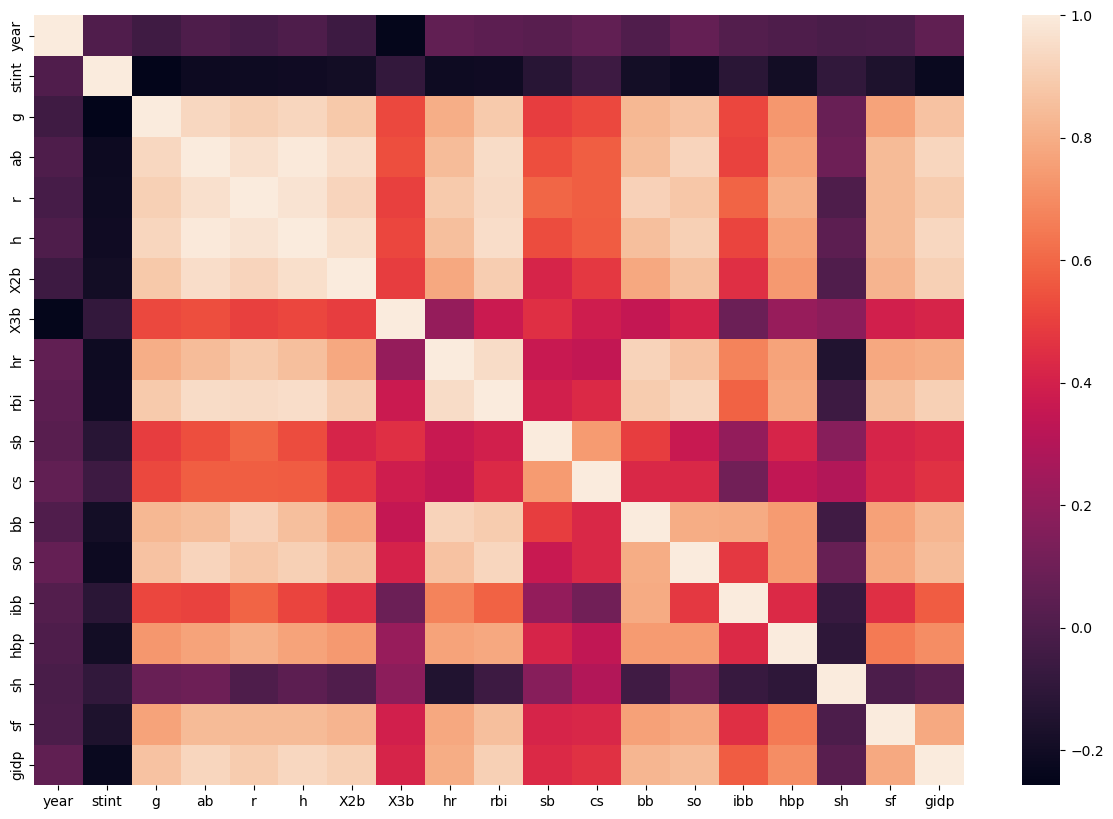

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = baseball.corr()
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax)


## Writing Data to Files

As well as being able to read several data input formats, Pandas can also export data to a variety of storage formats. We will bring your attention to just a couple of these.

In [111]:
mb.to_csv("mb.csv")

The `to_csv` method writes a `DataFrame` to a comma-separated values (csv) file. You can specify custom delimiters (via `sep` argument), how missing values are written (via `na_rep` argument), whether the index is writen (via `index` argument), whether the header is included (via `header` argument), among other options.

An efficient way of storing data to disk is in binary format. Pandas supports this using Python’s built-in pickle serialization.

In [112]:
baseball.to_pickle("baseball_pickle")

The complement to `to_pickle` is the `read_pickle` function, which restores the pickle to a `DataFrame` or `Series`:

In [113]:
pd.read_pickle("baseball_pickle")

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89525,benitar01,2007,2,FLO,NL,34,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
89526,benitar01,2007,1,SFN,NL,19,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,...,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0


It is recommended that binary storage of data via pickle only be used as a temporary storage format, in situations where speed is relevant. This is because there is no guarantee that the pickle format will not change with future versions of Python.